# 查看FashionMNIST原始数据格式

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from wangdao_deeplearning_train import EarlyStopping, ModelSaver,train_classification_model,plot_learning_curves
from wangdao_deeplearning_train import evaluate_classification_model as evaluate_model
# 加载Fashion MNIST数据集，张量就是和numpy数组一样
transform = transforms.Compose([])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
print(train_dataset[0])
train_dataset[0][0]

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 175kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.08MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.5MB/s]

(<PIL.Image.Image image mode=L size=28x28 at 0x78A4B0D4A4D0>, 9)


# 加载数据并处理为tensor

In [2]:
# 加载Fashion MNIST数据集，张量就是和numpy数组一样

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())


# 获取图像和标签
# 注意：由于使用了transform，图像已经被转换为张量且标准化
# 我们需要从dataset中提取原始图像用于显示
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()
test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

# 定义类别名称
class_names = ['T-shirt/top', '裤子', '套头衫', '连衣裙', '外套',
               '凉鞋', '衬衫', '运动鞋', '包', '短靴']

# 查看数据集基本信息
print(f"训练集形状: {train_images.shape}")
print(f"训练集标签数量: {len(train_labels)}")
print(f"测试集形状: {test_images.shape}")
print(f"测试集标签数量: {len(test_labels)}")

print(train_images[0])

train_labels[0:20]


训练集形状: (60000, 28, 28)
训练集标签数量: 60000
测试集形状: (10000, 28, 28)
测试集标签数量: 10000
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4])

In [3]:
#查看归一化后的效果
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [5]:
train_dataset[0][0].squeeze().shape

torch.Size([28, 28])

# 把数据集划分为训练集55000和验证集5000，并给DataLoader

In [6]:
# 从训练集中划分出验证集
train_size = 55000
val_size = 5000
# 设置随机种子以确保每次得到相同的随机划分结果
generator = torch.Generator().manual_seed(42)
train_subset, val_subset = torch.utils.data.random_split(
    train_dataset,
    [train_size, val_size],
    generator=generator #设置随机种子，确保每次得到相同的随机划分结果
)

# 创建数据加载器
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    train_subset,
    batch_size=batch_size,
    shuffle=True #打乱数据集，每次迭代时，数据集的顺序都会被打乱
)

val_loader = torch.utils.data.DataLoader(
    val_subset,
    batch_size=batch_size,
    shuffle=False
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)

# 打印数据集大小信息
print(f"训练集大小: {len(train_subset)}")
print(f"验证集大小: {len(val_subset)}")
print(f"测试集大小: {len(test_dataset)}")
print(f"批次大小: {batch_size}")
print(f"训练批次数: {len(train_loader)}")


训练集大小: 55000
验证集大小: 5000
测试集大小: 10000
批次大小: 64
训练批次数: 860


In [7]:
64*860

55040

In [8]:
def calculate_mean_std(train_dataset):
    # 首先将所有图像数据堆叠为一个大张量
    all_images = torch.stack([img_tensor for img_tensor, _ in train_dataset])
    print(all_images.shape)
    # 计算通道维度上的均值和标准差
    # Fashion MNIST是灰度图像，只有一个通道
    # 对所有像素值计算均值和标准差
    mean = torch.mean(all_images)
    std = torch.std(all_images)

    print(f"训练数据集均值: {mean.item():.4f}")
    print(f"训练数据集标准差: {std.item():.4f}")

    # 检查数据集大小
    print(f"数据集中图像总数: {len(train_dataset)}")
calculate_mean_std(train_subset)

torch.Size([55000, 1, 28, 28])
训练数据集均值: 0.2856
训练数据集标准差: 0.3527
数据集中图像总数: 55000


# 搭建模型

In [9]:

#理解每个接口的方法，单独写例子
import torch.nn as nn
m=nn.BatchNorm1d(100) # 创建一个批量归一化层，输入特征维度为100
x=torch.randn(20,100) # 创建一个20行100列的随机张量
print(m(x).shape) # 打印批量归一化后的张量形状

torch.Size([20, 100])


In [10]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        #normalize
        self.transform = nn.Sequential(
            transforms.Normalize([0.2856], [0.3527])
        )

        # 第一组卷积层 - 32个卷积核
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1) # 输入通道数，输出通道数代表的是卷积核的个数
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # 第二组卷积层 - 64个卷积核
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)


        # 第三组卷积层 - 128个卷积核
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, padding=1)


        # 计算全连接层的输入特征数
        # 经过3次池化，图像尺寸从28x28变为3x3x128
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 10)

        # 初始化权重
        self.init_weights()

    def init_weights(self):
        """使用 xavier 均匀分布来初始化卷积层和全连接层的权重"""
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        # x.shape [batch size, 1, 28, 28]

        # 第一组卷积层
        x = F.selu(self.conv1(x))
        # print(f"conv1后的形状: {x.shape}")
        x = F.selu(self.conv2(x))
        # print(f"conv2后的形状: {x.shape}")
        x = self.pool(x)
        # print(f"pool1后的形状: {x.shape}")

        # 第二组卷积层
        x = F.selu(self.conv3(x))
        # print(f"conv3后的形状: {x.shape}")
        x = F.selu(self.conv4(x))
        # print(f"conv4后的形状: {x.shape}")
        x = self.pool(x)
        # print(f"pool2后的形状: {x.shape}")

        # 第三组卷积层
        x = F.selu(self.conv5(x))
        # print(f"conv5后的形状: {x.shape}")
        x = F.selu(self.conv6(x))
        # print(f"conv6后的形状: {x.shape}")
        x = self.pool(x)
        # print(f"pool3后的形状: {x.shape}")

        # 展平
        x = x.view(x.size(0), -1)
        # print(f"展平后的形状: {x.shape}")

        # 全连接层
        x = F.selu(self.fc1(x))
        # print(f"fc1后的形状: {x.shape}")
        x = self.fc2(x)
        # print(f"fc2后的形状: {x.shape}")

        return x

In [11]:
# 实例化模型
model = NeuralNetwork()

# 从train_loader获取第一个批次的数据
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 查看批次数据的形状
print("批次图像形状:", images.shape)
print("批次标签形状:", labels.shape)


print('-'*100)
# 进行前向传播
with torch.no_grad():  # 不需要计算梯度
    outputs = model(images)


print(outputs.shape)




批次图像形状: torch.Size([64, 1, 28, 28])
批次标签形状: torch.Size([64])
----------------------------------------------------------------------------------------------------
torch.Size([64, 10])


In [12]:
# 计算模型的总参数量
# 统计需要求梯度的参数总量
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"需要求梯度的参数总量: {total_params}")

# 统计所有参数总量
all_params = sum(p.numel() for p in model.parameters())
print(f"模型总参数量: {all_params}")

# 查看每层参数量明细
print("\n各层参数量明细:")
for name, param in model.named_parameters():
    print(f"{name}: {param.numel()} 参数")

需要求梯度的参数总量: 584170
模型总参数量: 584170

各层参数量明细:
conv1.weight: 288 参数
conv1.bias: 32 参数
conv2.weight: 9216 参数
conv2.bias: 32 参数
conv3.weight: 18432 参数
conv3.bias: 64 参数
conv4.weight: 36864 参数
conv4.bias: 64 参数
conv5.weight: 73728 参数
conv5.bias: 128 参数
conv6.weight: 147456 参数
conv6.bias: 128 参数
fc1.weight: 294912 参数
fc1.bias: 256 参数
fc2.weight: 2560 参数
fc2.bias: 10 参数


# 各层参数量明细
conv1.weight: 288 参数
conv1.bias: 32 参数
conv2.weight: 9216 参数
conv2.bias: 32 参数
conv3.weight: 18432 参数
conv3.bias: 64 参数
conv4.weight: 36864 参数
conv4.bias: 64 参数
conv5.weight: 73728 参数
conv5.bias: 128 参数
conv6.weight: 147456 参数
conv6.bias: 128 参数
fc1.weight: 294912 参数
fc1.bias: 256 参数
fc2.weight: 2560 参数
fc2.bias: 10 参数

In [13]:
model.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-6.2947e-02, -1.2282e-01, -1.1551e-01],
                        [-8.9397e-02,  4.5994e-02,  6.2434e-03],
                        [ 4.8837e-02, -1.3692e-01,  7.0692e-02]]],
              
              
                      [[[-6.8384e-02, -4.3702e-02,  7.0685e-02],
                        [ 7.1225e-02, -7.4908e-02,  9.7489e-02],
                        [ 4.4925e-02,  5.2327e-03, -5.7753e-03]]],
              
              
                      [[[-7.3291e-02,  1.0948e-01,  1.2501e-01],
                        [-1.2641e-01, -5.7157e-03,  7.9849e-02],
                        [ 7.8120e-02, -9.9294e-02,  1.0056e-02]]],
              
              
                      [[[ 1.7028e-03, -1.2114e-01, -1.4065e-02],
                        [-7.7499e-02,  1.0547e-01,  6.8886e-02],
                        [ 5.8025e-02, -1.3865e-01, -8.5718e-02]]],
              
              
                      [[[ 5.8767e-02, -7.8710e-02,  1.1038e-01

# 设置交叉熵损失函数，SGD优化器

In [14]:
model = NeuralNetwork()
# 定义损失函数和优化器
loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数，适用于多分类问题，里边会做softmax，还有会把0-9标签转换成one-hot编码

print("损失函数:", loss_fn)


损失函数: CrossEntropyLoss()


In [15]:
model = NeuralNetwork()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # SGD优化器，学习率为0.01，动量为0.9

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")
model = model.to(device) #将模型移动到GPU
early_stopping=EarlyStopping(patience=10, delta=0.001)
model_saver=ModelSaver(save_dir='model_weights', save_best_only=True)


model, history = train_classification_model(model, train_loader, val_loader, loss_fn, optimizer, device, num_epochs=50,early_stopping=early_stopping, model_saver=model_saver, tensorboard_logger=None,eval_step=50)

使用设备: cuda:0
训练开始，共43000步


  0%|          | 0/43000 [00:00<?, ?it/s]

早停触发! 最佳验证准确率(如果是回归，这里是损失): 90.1400
早停: 在4300 步


In [17]:
history['train'][-100:-1]

[{'loss': 0.1836867481470108, 'acc': 93.75, 'step': 4201},
 {'loss': 0.2966601848602295, 'acc': 85.9375, 'step': 4202},
 {'loss': 0.13993136584758759, 'acc': 95.3125, 'step': 4203},
 {'loss': 0.2329312413930893, 'acc': 92.1875, 'step': 4204},
 {'loss': 0.09607194364070892, 'acc': 98.4375, 'step': 4205},
 {'loss': 0.23438189923763275, 'acc': 93.75, 'step': 4206},
 {'loss': 0.11488863825798035, 'acc': 96.875, 'step': 4207},
 {'loss': 0.20476332306861877, 'acc': 92.1875, 'step': 4208},
 {'loss': 0.15407900512218475, 'acc': 92.1875, 'step': 4209},
 {'loss': 0.27642279863357544, 'acc': 87.5, 'step': 4210},
 {'loss': 0.35078826546669006, 'acc': 90.625, 'step': 4211},
 {'loss': 0.2047327309846878, 'acc': 92.1875, 'step': 4212},
 {'loss': 0.16073590517044067, 'acc': 93.75, 'step': 4213},
 {'loss': 0.28836461901664734, 'acc': 87.5, 'step': 4214},
 {'loss': 0.11003118753433228, 'acc': 98.4375, 'step': 4215},
 {'loss': 0.3470829427242279, 'acc': 89.0625, 'step': 4216},
 {'loss': 0.310112506151199

# 绘制损失曲线和准确率曲线

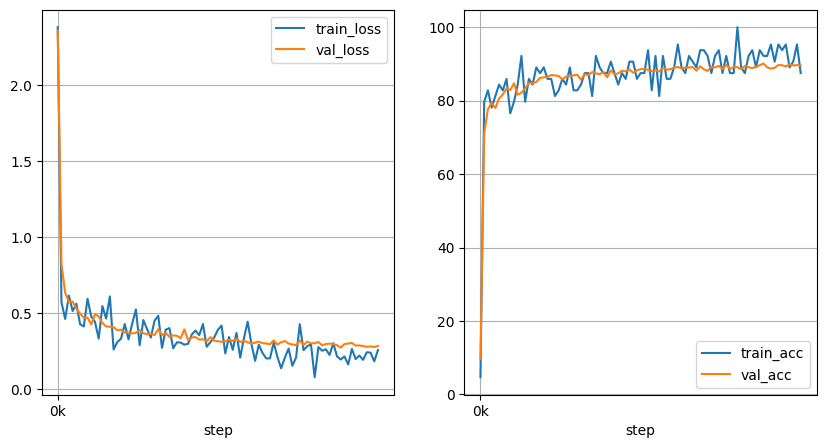

In [18]:
plot_learning_curves(history, sample_step=50)  #横坐标是 steps

In [19]:
# 在测试集上评估模型
test_accuracy = evaluate_model(model, test_loader, device, loss_fn)
test_accuracy


(89.29, 0.28838243021965027)